02/05/2023      
notebook     
objectif : faire le bilan sous forme de diagrammes en bâton cumulés et diagramme de Wenn.    
contexte : 

# Evaluation comparative  du système d'entity linking de SpaCy

## Appliquons l'entity linker à l'ensemble du corpus

En premier lieu, nous commençons par appliquer le module d'entity linking à l'ensemble du corpus. 
Nous enregistrons les sorties sous la forme de dictionnaires, chaque dictionnaire est pourvu d'un identifiant. contenant le 

In [13]:
import json
import spacy  # version 3.5
import glob
import pandas as pd

def lire_fichier(chemin):
    with open (chemin, "r", encoding="utf-8") as fichier:
        texte=fichier.read()
        return texte
def stocker(chemin, contenu):
    w =open(chemin, "w")
    w.write(json.dumps(contenu , indent = 2))
    w.close()

nlp = spacy.load("fr_core_news_lg")
nlp.add_pipe("entityLinker", last=True)

path_corpora = "../DATA/DATA-Fra_spaCy3.3.1_CONCAT/*/*/*/*.txt"

for path in glob.glob(path_corpora):
    print(path)
    txt=lire_fichier(path)
    #doc = nlp(txt[:5000])  
    doc = nlp(txt) 
    i=0
    dico_sent_tok ={}
    
    
    for ent in doc._.linkedEntities: 
            ide = "ID"+str(i)
            url_00 = ent.get_url()
            label_00=ent.get_label()
            description=ent.get_description()
            span_00=ent.get_span()
            span_oo=str(span_00)
            doc2=nlp(span_oo)
            for en in doc2.ents:#Pour le typage avec les labels de l'entity linking
                
                # print(en.label_)
                dico_sent_tok[ide]={}
                dico_sent_tok[ide]["url"]=url_00
                dico_sent_tok[ide]["span"]=span_oo
                dico_sent_tok[ide]["label"]=label_00
                dico_sent_tok[ide]["description"]=description
                dico_sent_tok[ide]["type"]=en.label_#Pour le typage avec les labels de l'entity linking
                i+=1
            stocker("%s_entity-linker.json"%path,dico_sent_tok)


../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_krakenbase\ADAM_MOD\ADAM_Mon-village_Kraken-base.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_krakenbase\ADAM_PP\ADAM_Mon-village_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_TESSERACT-BIN\ADAM_MOD\ADAM_Mon-village_Tesseract-BIN.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_TESSERACT-BIN\ADAM_PP\ADAM_Mon-village_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_TESSERACT-PNG\ADAM_MOD\ADAM_Mon-village_Tesseract-PNG.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_TESSERACT-PNG\ADAM_PP\ADAM_Mon-village_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_TesseractFra-PNG\ADAM_MOD\ADAM_Mon-village_TesseractFra-PNG.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\ADAM\ADAM_TesseractFra-PNG\ADAM_PP\ADAM_Mon-village_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\AIMARD_RIVIERE\AIMARD-RIVIERE_kraken-base\AIMARD_MOD\AIMARD_belle-riviere_Kraken-base.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\AIMARD_RIVIERE\AIMARD-RIVIERE_kraken-base\AIMARD_PP\AIMARD_bell

../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_kraken-base\MAUPASSANT_PP\MAUPASSANT_une-vie_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_TESSERACT-PNG\MAUPASSANT_MOD\MAUPASSANT_une-vie_Tesseract-PNG.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_TESSERACT-PNG\MAUPASSANT_PP\MAUPASSANT_une-vie_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_TesseractFra-BIN\MAUPASSANT_MOD\MAUPASSANT_une-vie_TesseractFra-BIN.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_TesseractFra-BIN\MAUPASSANT_PP\MAUPASSANT_une-vie_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_TesseractFra-PNG\MAUPASSANT_MOD\MAUPASSANT_une-vie_TesseractFra-PNG.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\MAUPASSANT\MAUPASSANT_TesseractFra-PNG\MAUPASSANT_PP\MAUPASSANT_une-vie_PP.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\NOAILLES\NOAILLES_kraken-base\NOAILLES_MOD\NOAILLES_la-nouvelle-esperance_Kraken-base.txt
../DATA/DATA-Fra_spaCy3.3.1_CONCAT\NOAILLES\NO

## Analyse des résultats 

### définition des fonctions 

#### diagrammes en  bâtons

In [2]:
import json
import spacy  # version 3.5
import glob
import pandas as pd
import matplotlib.pyplot as plt

def lire_fichier(chemin):
    with open (chemin, "r", encoding="utf-8") as fichier:
        texte=fichier.read()
        return texte
def stocker(chemin, contenu):
    w =open(chemin, "w")
    w.write(json.dumps(contenu , indent = 2))
    w.close()
def batons (chemin, modele) :
    url_communs = []
    liste_loc = []
    liste_autre = []
    liste_a = []
    liste_b = []

    nlp = spacy.load(modele)
    nlp.add_pipe("entityLinker", last=True)

    

    for path in glob.glob(chemin):
        #print(path)
        txt=lire_fichier(path)
        #doc = nlp(txt[:5000]) 
        doc = nlp(txt)
        i=0
        dico_sent_tok ={}
        liste_loc = []
        liste_autre = []
    
    
    
        for ent in doc._.linkedEntities: 
            ide = "ID"+str(i)
            url_00 = ent.get_url()
            label_00=ent.get_label()
            description=ent.get_description()
            span_00=ent.get_span()
            span_oo=str(span_00)
            doc2=nlp(span_oo)
            for en in doc2.ents:#Pour le typage avec les labels de l'entity linking
                
                # print(en.label_)
                dico_sent_tok[ide]={}
                dico_sent_tok[ide]["url"]=url_00
                dico_sent_tok[ide]["span"]=span_oo
                dico_sent_tok[ide]["label"]=label_00
                dico_sent_tok[ide]["description"]=description
                dico_sent_tok[ide]["type"]=en.label_#Pour le typage avec les labels de l'entity linking
                i+=1
                
                if dico_sent_tok[ide]["type"] == "LOC":
                    #dico_sent_tok[ide]["type"] = True
                    liste_loc.append(dico_sent_tok[ide])
                else:
                    #dico_sent_tok[ide]["type"] = False
                    liste_autre.append(dico_sent_tok)
        a=len(liste_loc)
        # nb de dictionnaire qui contiennent des loc
        b=len(liste_autre)
        #nb de dictionnaire qui ne contiennent pas des loc
        liste_a.append(a)
        liste_b.append(b)
        #stocker("%s_entity-linker.json"%path,dico_sent_tok)
                    

    largeur_barre = 0.8


    x = range(len(liste_a)) # position en abscisse des barres

    # # Tracé

    plt.bar(x, liste_a, width = largeur_barre, color = "#3ED8C9")

    plt.bar(x, liste_b, width = largeur_barre, bottom = liste_a, color = "#EDFF91")

    plt.xticks(range(len(liste_a)), ['Kraken', 'référence', 'Tesseract binarisé', 'référence', 'Tesseract PNG','référence', 'TesseractFra PNG', 'reference'], rotation=90)
    
    plt.show()

#### diagrammes de Venn

In [5]:
import os
import json
from matplotlib import pyplot as plt
import numpy as np
from matplotlib_venn import venn2, venn2_circles
import glob

def Venn (chemin):
    # spécifiez le chemin vers votre dossier contenant les fichiers
    path_corpora = "../DATA/DATA-Fra_spaCy3.3.1_CONCAT/ADAM/*/*/*.json"

    # créez une liste pour stocker les ensembles d'URL communs
    liste = []
    liste_fichier = []

    # bouclez à travers tous les fichiers dans le dossier
    for nom_fichier in glob.glob(chemin):
        if "entity-linker" in str(nom_fichier):
            liste_fichier= ['Kraken', 'le texte de référence', 'Tesseract binarisé', 'le texte de référence', 'Tesseract PNG','le texte de référence', 'TesseractFra PNG', 'le texte de référence']
            # ouvrez le fichier et chargez les dictionnaires JSON
            with open(nom_fichier) as f:
                dictionnaires = json.load(f)

            # créez un ensemble pour les URL du fichier courant
            set_url = set()

            # bouclez à travers tous les dictionnaires dans le fichier
            for cle, dico in dictionnaires.items():
                # obtenez l'URL du dictionnaire
                url = dico.get("url")
                # ajoutez l'url à l'ensemble des URL
                set_url.add(url)

            # ajoutez l'ensemble d'URL du fichier courant à la liste
            liste.append(set_url)

    arr = None
    # bouclez à travers les paires d'ensembles d'URL dans la liste
    for i in range(len(liste) - 1):
        ocr = liste[i]
        nb_ocr = len(ocr)
        reference = liste[i+1]
        nb_reference = len (reference)
        intersection = ocr.intersection(reference)
        nb_intersection = len(intersection)
        element_propre_ocr = len([element for element in ocr if element not in reference]) 
        element_propre_reference = len([element for element in reference if element not in ocr])
        nom = liste_fichier[i]
        if arr is None:
            arr = np.array([nom, nb_ocr, nb_reference, nb_intersection, element_propre_ocr, element_propre_reference])
        else:
            arr = np.vstack((arr, [nom, nb_ocr, nb_reference, nb_intersection, element_propre_ocr, element_propre_reference]))

        # affiche les noms des fichiers
        print("Valeur commune entre", liste_fichier[i], "et", liste_fichier[i+1] )
 

        # vérifie si les ensembles d'URL contiennent des éléments avant de générer le Venn diagram
        if ocr and reference:
            venn2([ocr, reference], set_labels=(str(liste_fichier[i]), str(liste_fichier[i+1])))
            plt.show()
        else:
            print("Ensemble d'URL vide pour au moins un fichier")

    print(arr)


### Génération des diagrammes

#### Exemple d'Adam

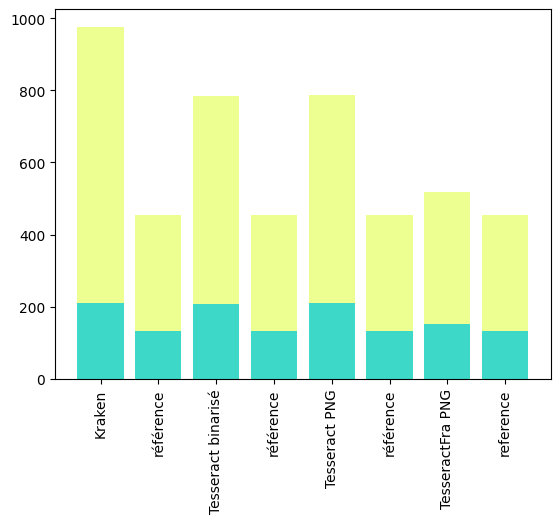

In [32]:
path_corpora = '../DATA/DATA-Fra_spaCy3.3.1_CONCAT/ADAM/*/*/*.txt'
batons (path_corpora)

#### génération des diagrammes pour l'ensemble du corpus

In [3]:
dliste = []
rootdir = "../DATA/DATA-Fra_spaCy3.3.1_CONCAT/"
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        e = d+"/*/*/*.txt" 
        print (file)
        batons(e, )
        
        
        

ADAM


TypeError: batons() missing 1 required positional argument: 'modele'

ADAM
Valeur commune entre Kraken et le texte de référence


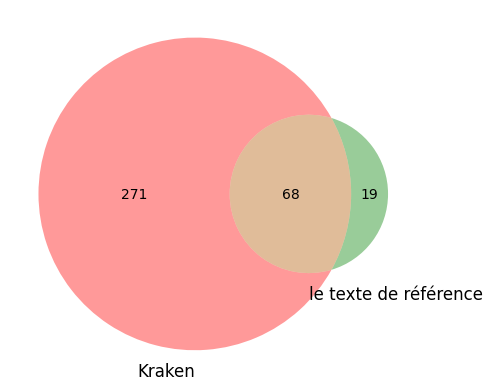

Valeur commune entre le texte de référence et Tesseract binarisé


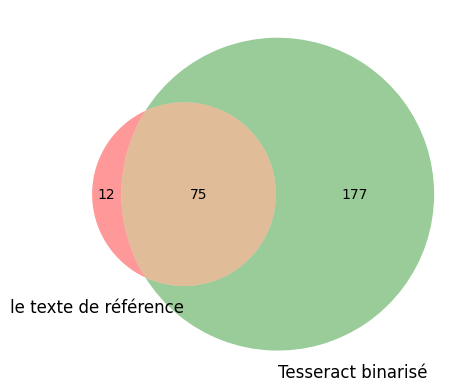

Valeur commune entre Tesseract binarisé et le texte de référence


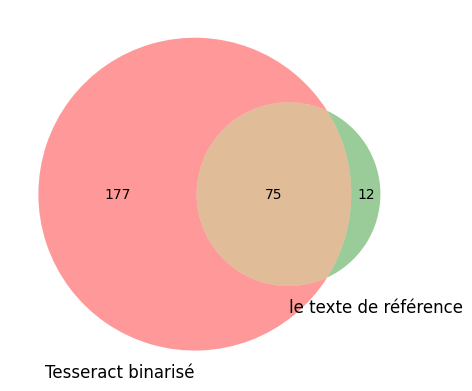

Valeur commune entre le texte de référence et Tesseract PNG


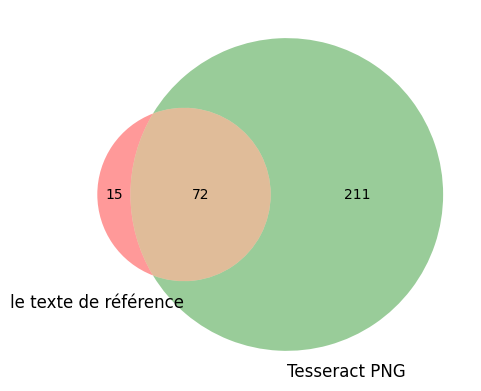

Valeur commune entre Tesseract PNG et le texte de référence


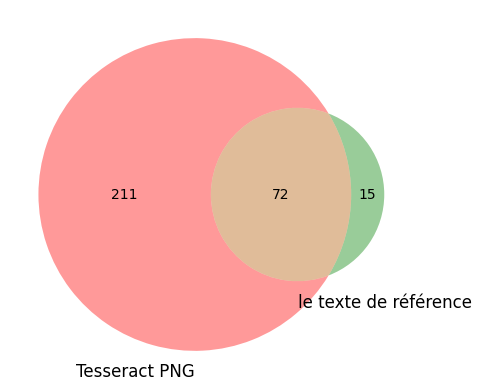

Valeur commune entre le texte de référence et TesseractFra PNG


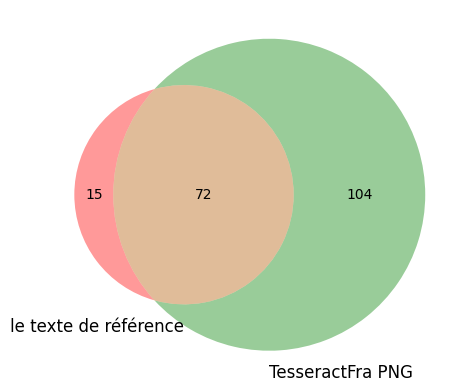

Valeur commune entre TesseractFra PNG et le texte de référence


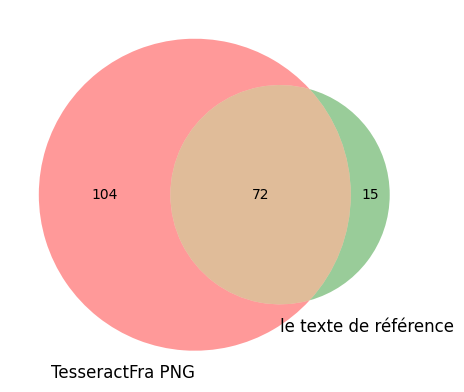

[['Kraken' '339' '87' '68' '271' '19']
 ['le texte de référence' '87' '252' '75' '12' '177']
 ['Tesseract binarisé' '252' '87' '75' '177' '12']
 ['le texte de référence' '87' '283' '72' '15' '211']
 ['Tesseract PNG' '283' '87' '72' '211' '15']
 ['le texte de référence' '87' '176' '72' '15' '104']
 ['TesseractFra PNG' '176' '87' '72' '104' '15']]
AIMARD_RIVIERE
Valeur commune entre Kraken et le texte de référence


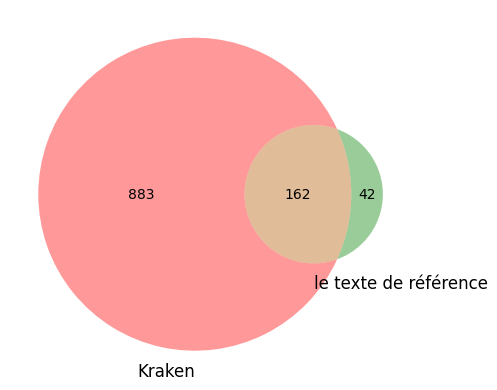

Valeur commune entre le texte de référence et Tesseract binarisé


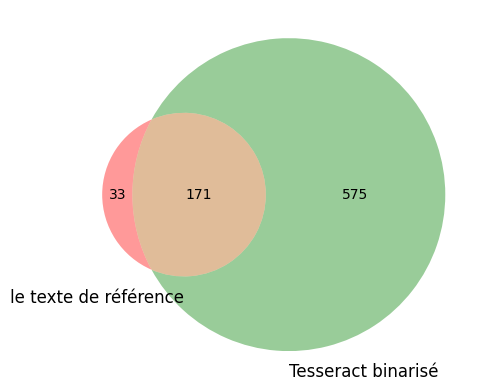

Valeur commune entre Tesseract binarisé et le texte de référence


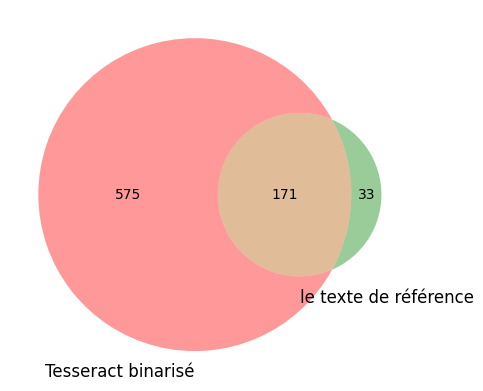

Valeur commune entre le texte de référence et Tesseract PNG


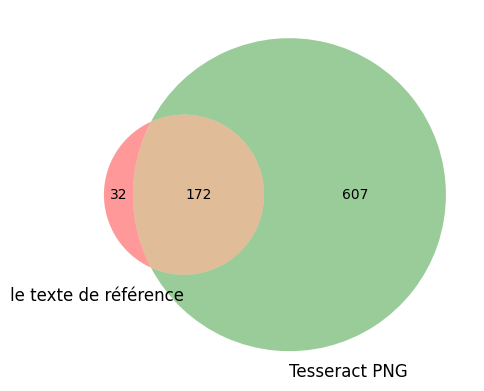

Valeur commune entre Tesseract PNG et le texte de référence


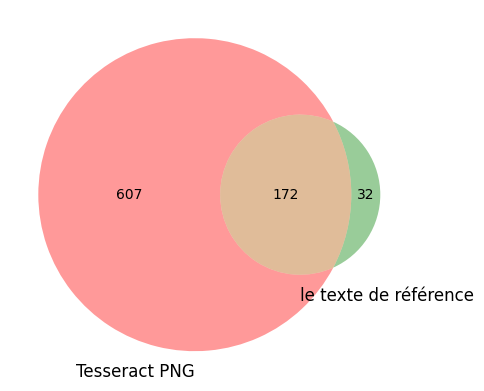

Valeur commune entre le texte de référence et TesseractFra PNG


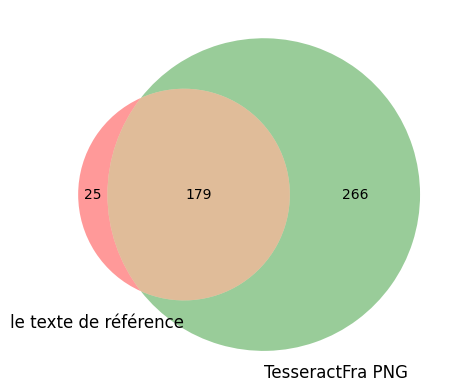

Valeur commune entre TesseractFra PNG et le texte de référence


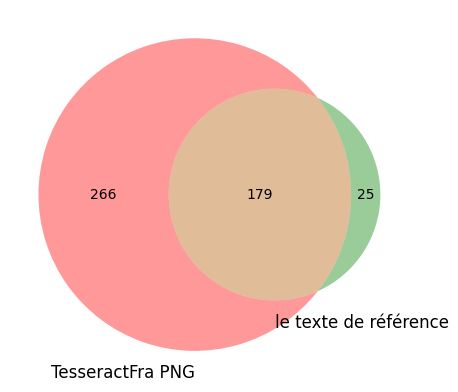

[['Kraken' '1045' '204' '162' '883' '42']
 ['le texte de référence' '204' '746' '171' '33' '575']
 ['Tesseract binarisé' '746' '204' '171' '575' '33']
 ['le texte de référence' '204' '779' '172' '32' '607']
 ['Tesseract PNG' '779' '204' '172' '607' '32']
 ['le texte de référence' '204' '445' '179' '25' '266']
 ['TesseractFra PNG' '445' '204' '179' '266' '25']]
AIMARD_TRAPPEURS
Valeur commune entre Kraken et le texte de référence


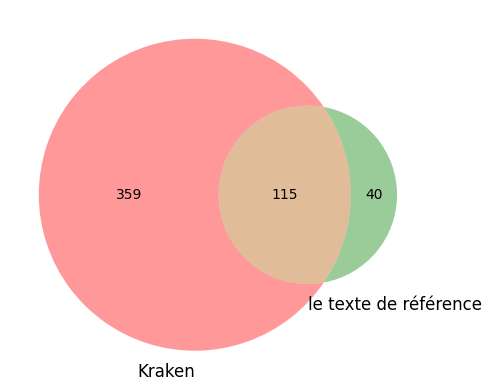

Valeur commune entre le texte de référence et Tesseract binarisé


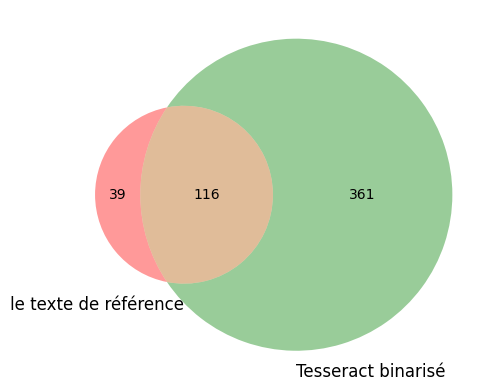

Valeur commune entre Tesseract binarisé et le texte de référence


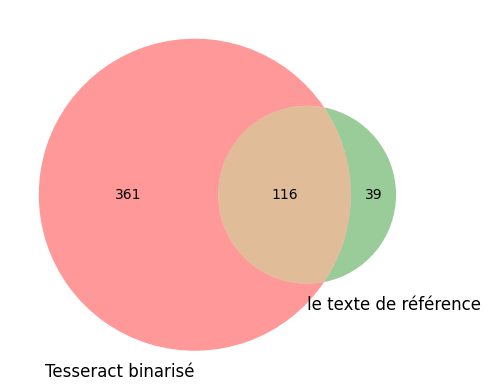

Valeur commune entre le texte de référence et Tesseract PNG


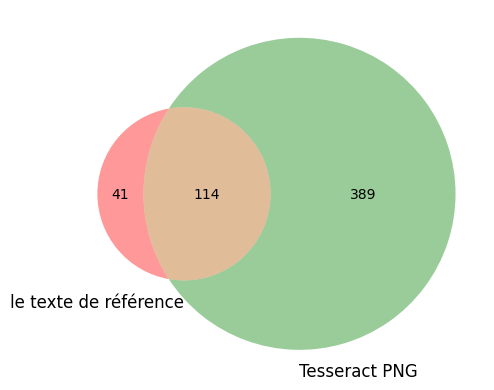

Valeur commune entre Tesseract PNG et le texte de référence


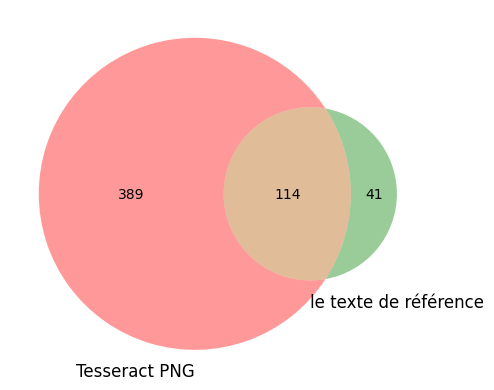

Valeur commune entre le texte de référence et TesseractFra PNG


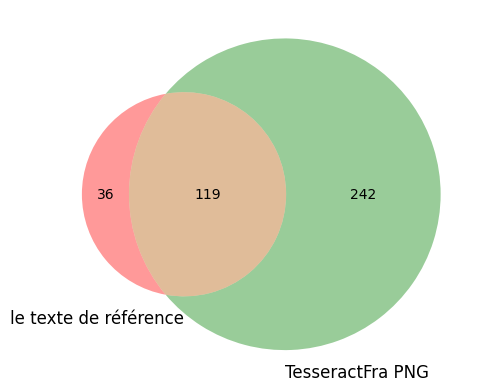

Valeur commune entre TesseractFra PNG et le texte de référence


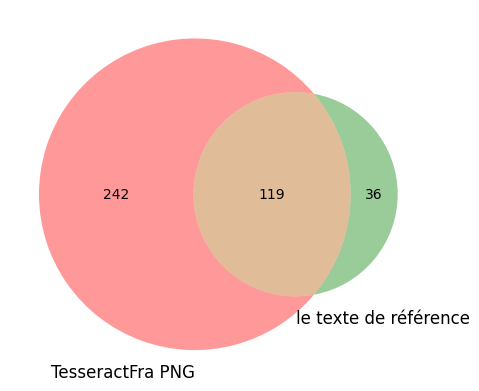

[['Kraken' '474' '155' '115' '359' '40']
 ['le texte de référence' '155' '477' '116' '39' '361']
 ['Tesseract binarisé' '477' '155' '116' '361' '39']
 ['le texte de référence' '155' '503' '114' '41' '389']
 ['Tesseract PNG' '503' '155' '114' '389' '41']
 ['le texte de référence' '155' '361' '119' '36' '242']
 ['TesseractFra PNG' '361' '155' '119' '242' '36']]
AUDOUX
Valeur commune entre Kraken et le texte de référence


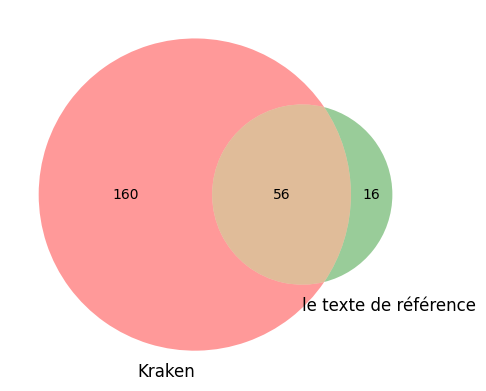

Valeur commune entre le texte de référence et Tesseract binarisé


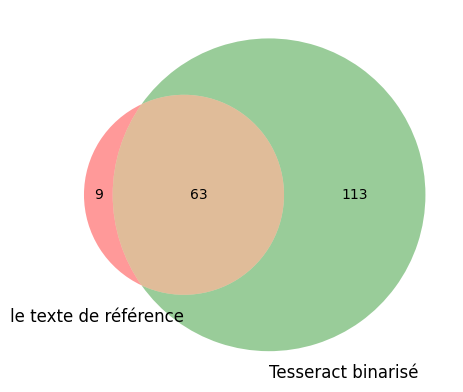

Valeur commune entre Tesseract binarisé et le texte de référence


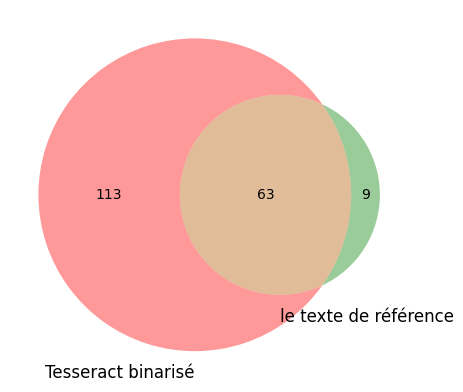

Valeur commune entre le texte de référence et Tesseract PNG


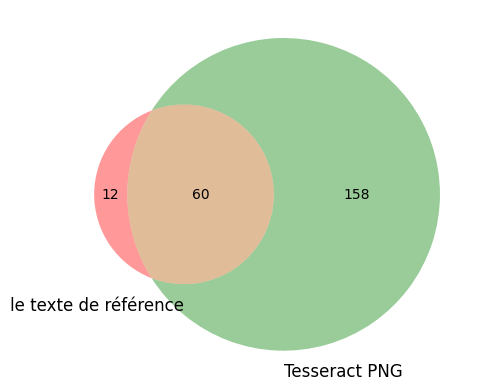

Valeur commune entre Tesseract PNG et le texte de référence


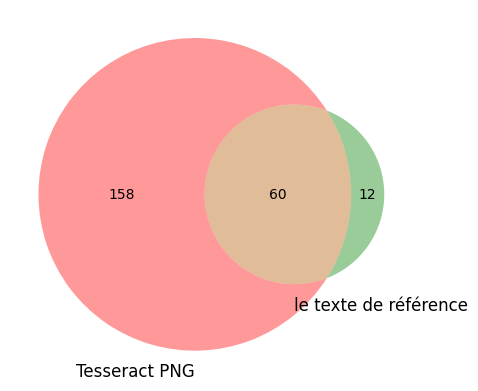

Valeur commune entre le texte de référence et TesseractFra PNG


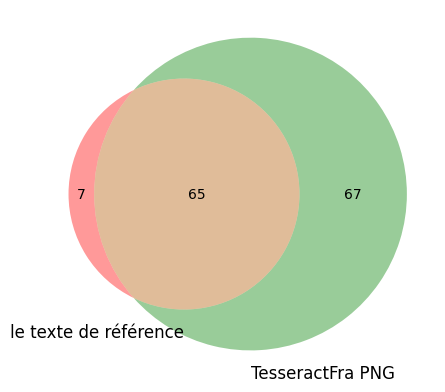

Valeur commune entre TesseractFra PNG et le texte de référence


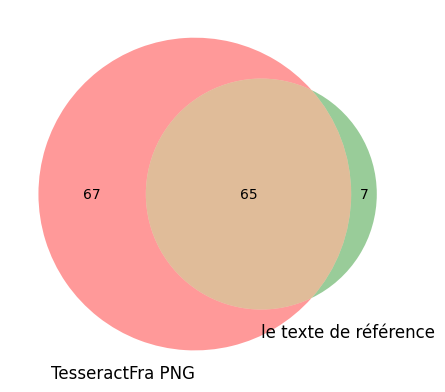

[['Kraken' '216' '72' '56' '160' '16']
 ['le texte de référence' '72' '176' '63' '9' '113']
 ['Tesseract binarisé' '176' '72' '63' '113' '9']
 ['le texte de référence' '72' '218' '60' '12' '158']
 ['Tesseract PNG' '218' '72' '60' '158' '12']
 ['le texte de référence' '72' '132' '65' '7' '67']
 ['TesseractFra PNG' '132' '72' '65' '67' '7']]
BALZAC
Valeur commune entre Kraken et le texte de référence


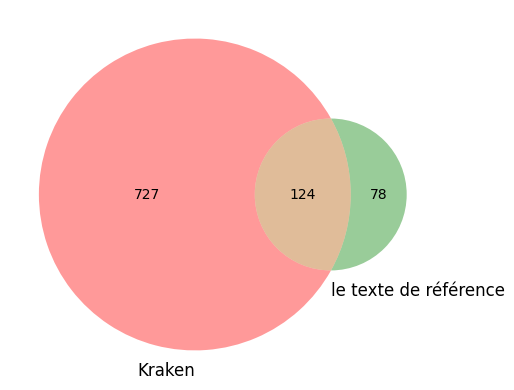

Valeur commune entre le texte de référence et Tesseract binarisé


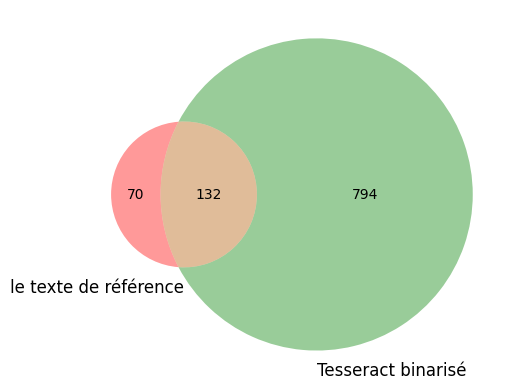

Valeur commune entre Tesseract binarisé et le texte de référence


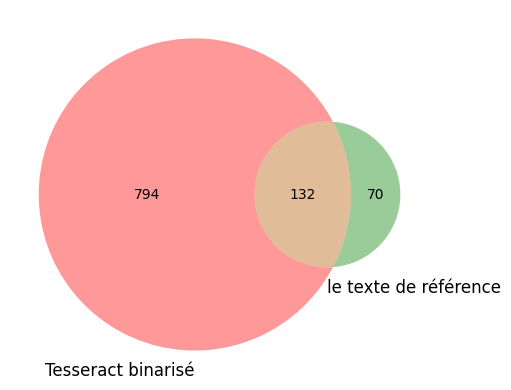

Valeur commune entre le texte de référence et Tesseract PNG


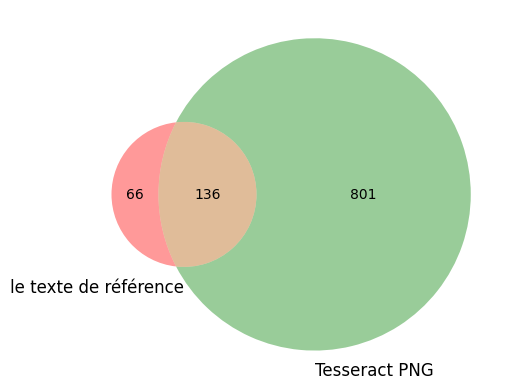

Valeur commune entre Tesseract PNG et le texte de référence


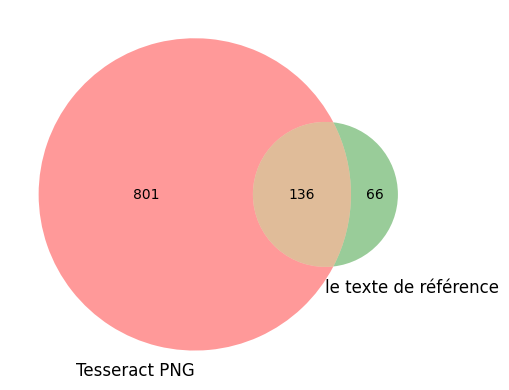

Valeur commune entre le texte de référence et TesseractFra PNG


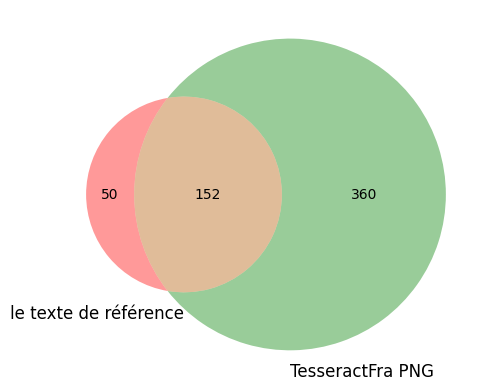

Valeur commune entre TesseractFra PNG et le texte de référence


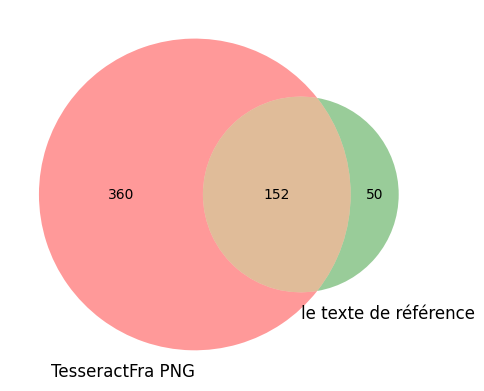

[['Kraken' '851' '202' '124' '727' '78']
 ['le texte de référence' '202' '926' '132' '70' '794']
 ['Tesseract binarisé' '926' '202' '132' '794' '70']
 ['le texte de référence' '202' '937' '136' '66' '801']
 ['Tesseract PNG' '937' '202' '136' '801' '66']
 ['le texte de référence' '202' '512' '152' '50' '360']
 ['TesseractFra PNG' '512' '202' '152' '360' '50']]
CARRAUD
Valeur commune entre Kraken et le texte de référence


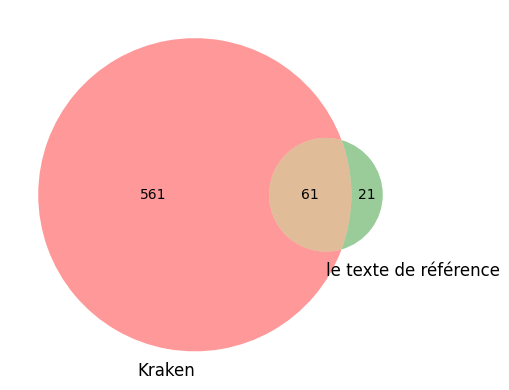

Valeur commune entre le texte de référence et Tesseract binarisé


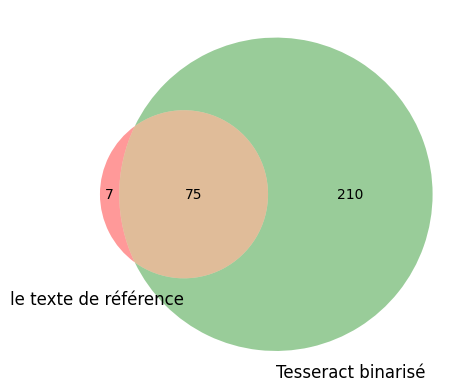

Valeur commune entre Tesseract binarisé et le texte de référence


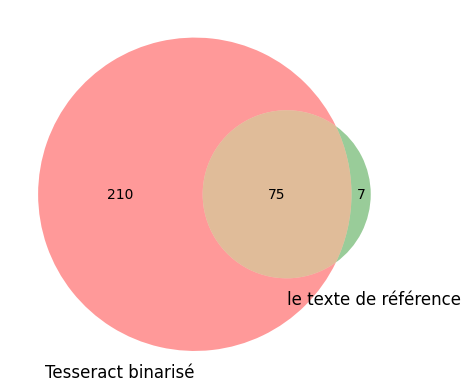

Valeur commune entre le texte de référence et Tesseract PNG


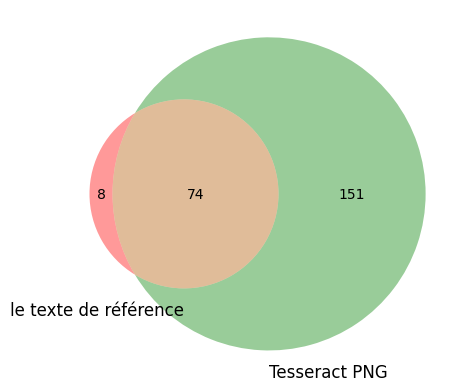

Valeur commune entre Tesseract PNG et le texte de référence


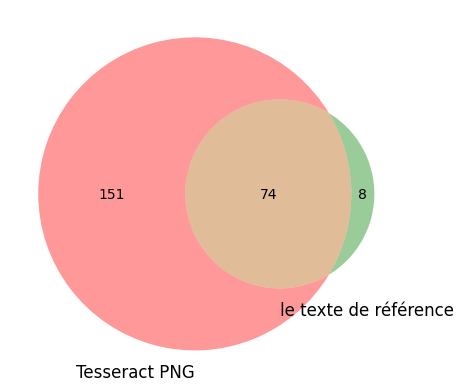

Valeur commune entre le texte de référence et TesseractFra PNG


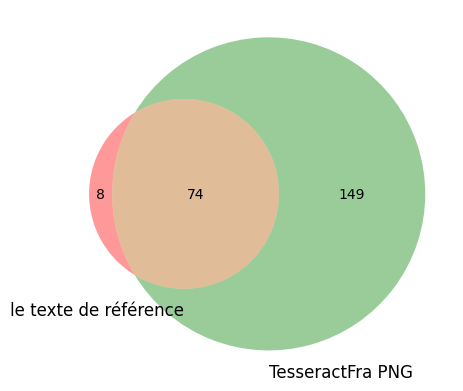

Valeur commune entre TesseractFra PNG et le texte de référence


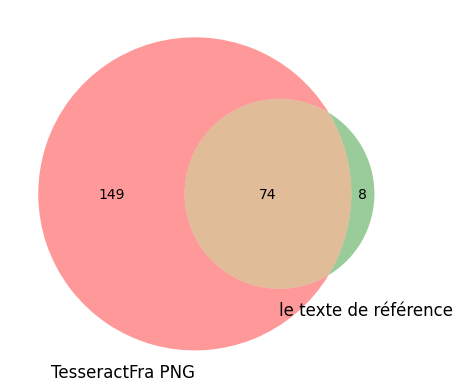

[['Kraken' '622' '82' '61' '561' '21']
 ['le texte de référence' '82' '285' '75' '7' '210']
 ['Tesseract binarisé' '285' '82' '75' '210' '7']
 ['le texte de référence' '82' '225' '74' '8' '151']
 ['Tesseract PNG' '225' '82' '74' '151' '8']
 ['le texte de référence' '82' '223' '74' '8' '149']
 ['TesseractFra PNG' '223' '82' '74' '149' '8']]
DASH
Valeur commune entre Kraken et le texte de référence


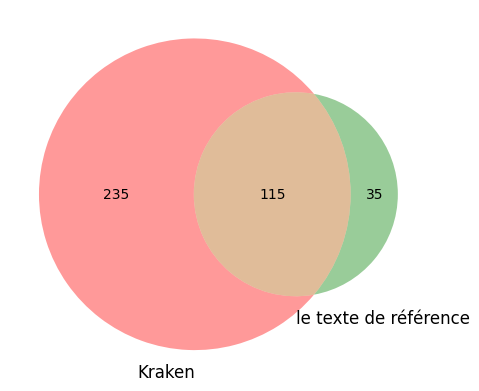

Valeur commune entre le texte de référence et Tesseract binarisé


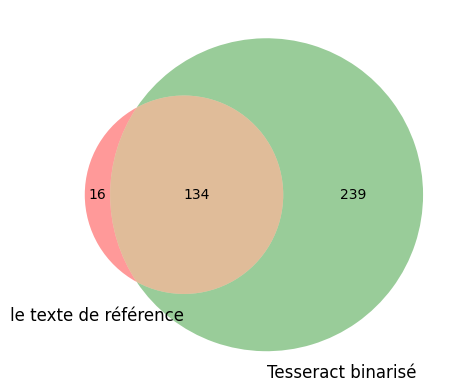

Valeur commune entre Tesseract binarisé et le texte de référence


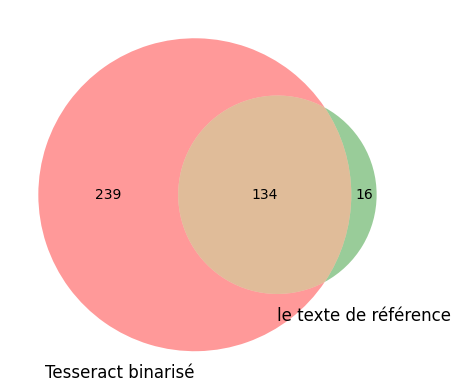

Valeur commune entre le texte de référence et Tesseract PNG


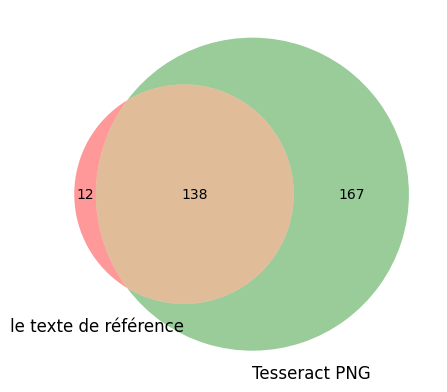

Valeur commune entre Tesseract PNG et le texte de référence


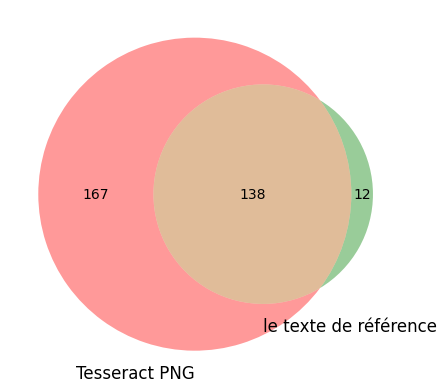

Valeur commune entre le texte de référence et TesseractFra PNG


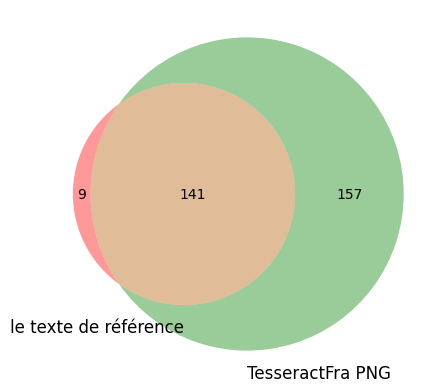

Valeur commune entre TesseractFra PNG et le texte de référence


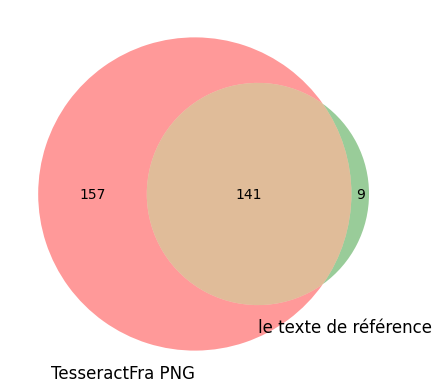

[['Kraken' '350' '150' '115' '235' '35']
 ['le texte de référence' '150' '373' '134' '16' '239']
 ['Tesseract binarisé' '373' '150' '134' '239' '16']
 ['le texte de référence' '150' '305' '138' '12' '167']
 ['Tesseract PNG' '305' '150' '138' '167' '12']
 ['le texte de référence' '150' '298' '141' '9' '157']
 ['TesseractFra PNG' '298' '150' '141' '157' '9']]
DAUDET
Valeur commune entre Kraken et le texte de référence


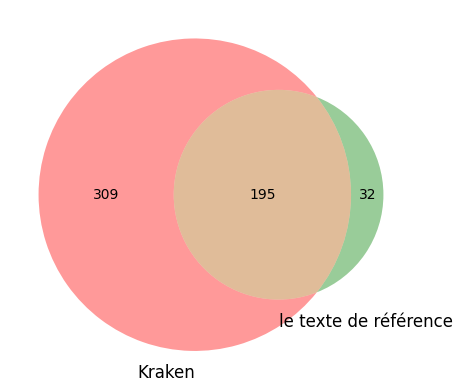

Valeur commune entre le texte de référence et Tesseract binarisé


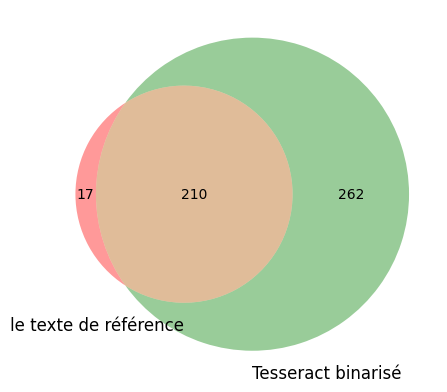

Valeur commune entre Tesseract binarisé et le texte de référence


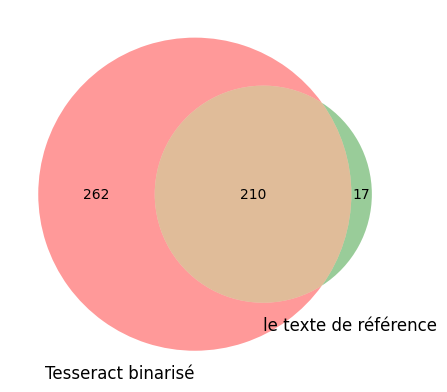

Valeur commune entre le texte de référence et Tesseract PNG


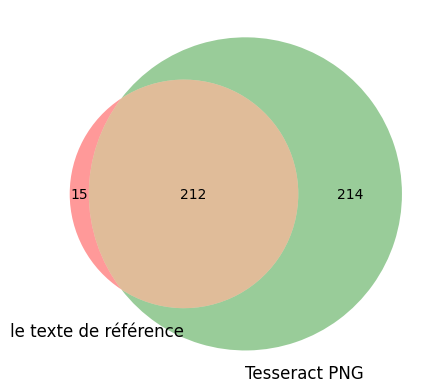

Valeur commune entre Tesseract PNG et le texte de référence


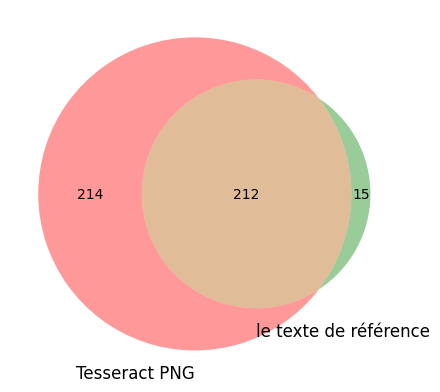

Valeur commune entre le texte de référence et TesseractFra PNG


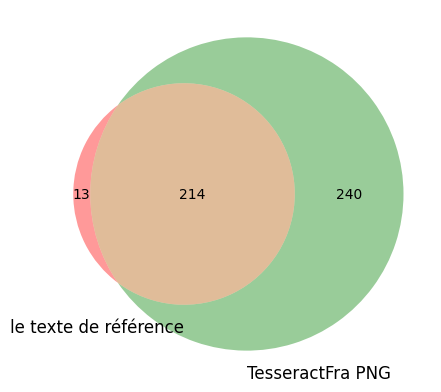

Valeur commune entre TesseractFra PNG et le texte de référence


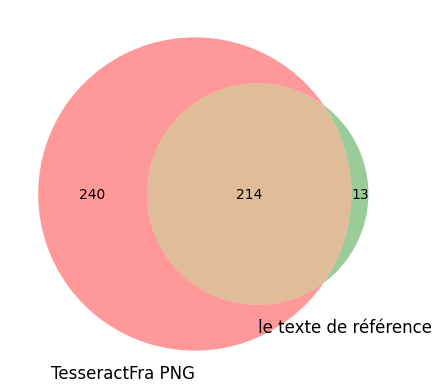

[['Kraken' '504' '227' '195' '309' '32']
 ['le texte de référence' '227' '472' '210' '17' '262']
 ['Tesseract binarisé' '472' '227' '210' '262' '17']
 ['le texte de référence' '227' '426' '212' '15' '214']
 ['Tesseract PNG' '426' '227' '212' '214' '15']
 ['le texte de référence' '227' '454' '214' '13' '240']
 ['TesseractFra PNG' '454' '227' '214' '240' '13']]
FLAUBERT
Valeur commune entre Kraken et le texte de référence


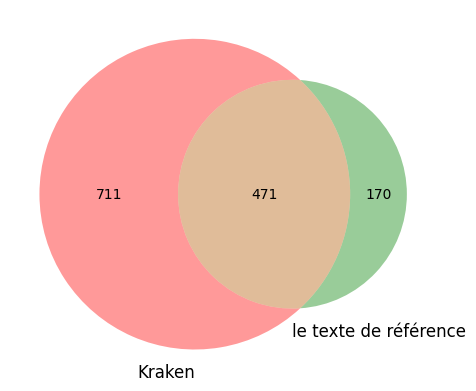

Valeur commune entre le texte de référence et Tesseract binarisé


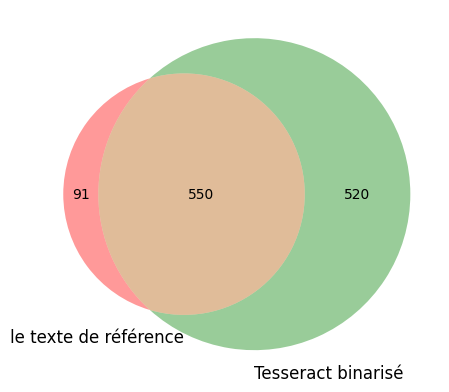

Valeur commune entre Tesseract binarisé et le texte de référence


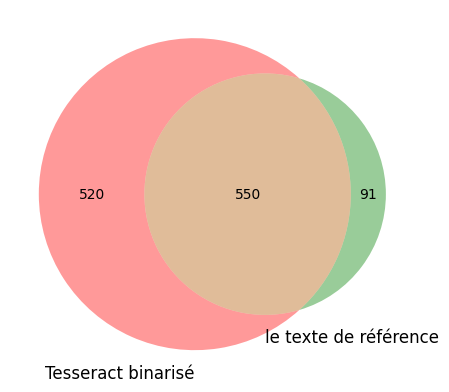

Valeur commune entre le texte de référence et Tesseract PNG


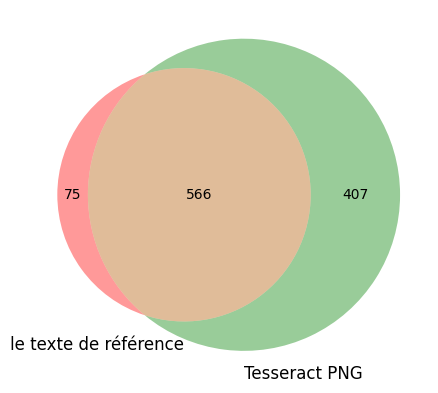

Valeur commune entre Tesseract PNG et le texte de référence


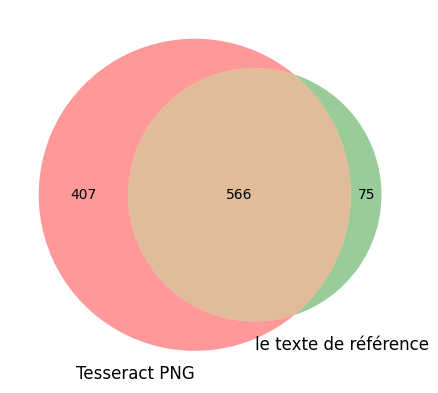

Valeur commune entre le texte de référence et TesseractFra PNG


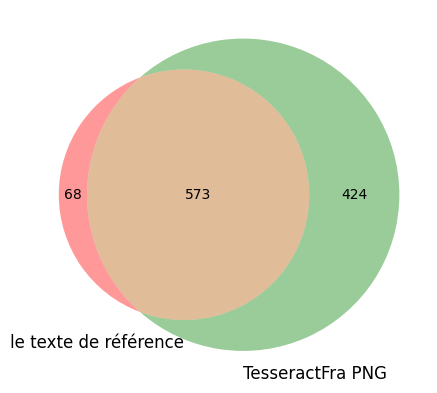

Valeur commune entre TesseractFra PNG et le texte de référence


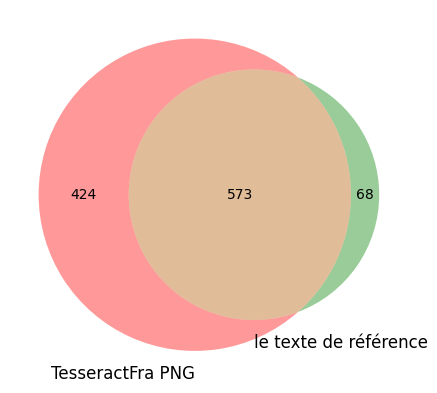

[['Kraken' '1182' '641' '471' '711' '170']
 ['le texte de référence' '641' '1070' '550' '91' '520']
 ['Tesseract binarisé' '1070' '641' '550' '520' '91']
 ['le texte de référence' '641' '973' '566' '75' '407']
 ['Tesseract PNG' '973' '641' '566' '407' '75']
 ['le texte de référence' '641' '997' '573' '68' '424']
 ['TesseractFra PNG' '997' '641' '573' '424' '68']]
MAUPASSANT
Valeur commune entre Kraken et le texte de référence


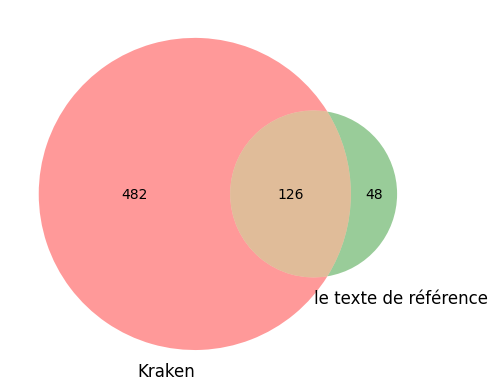

Valeur commune entre le texte de référence et Tesseract binarisé


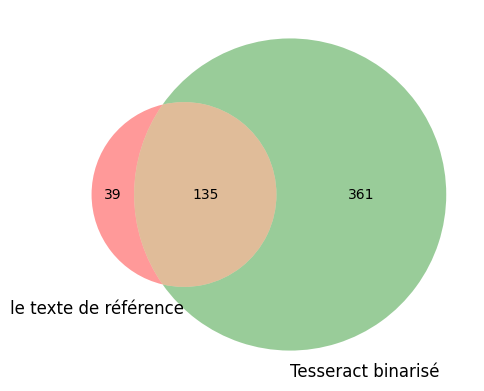

Valeur commune entre Tesseract binarisé et le texte de référence


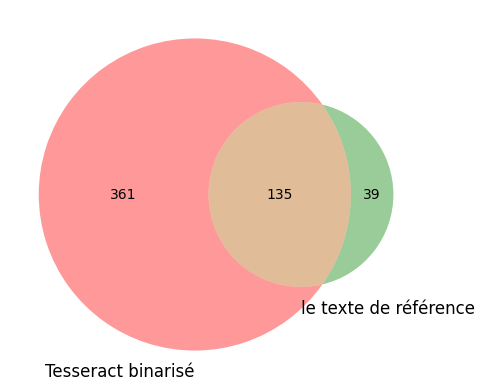

Valeur commune entre le texte de référence et Tesseract PNG


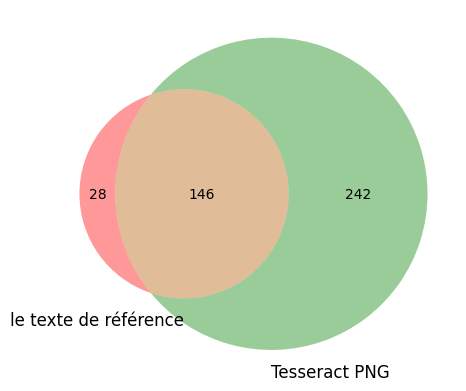

Valeur commune entre Tesseract PNG et le texte de référence


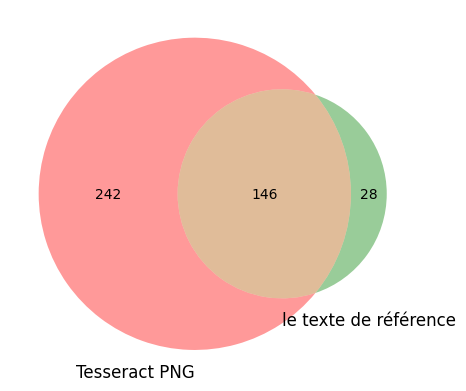

Valeur commune entre le texte de référence et TesseractFra PNG


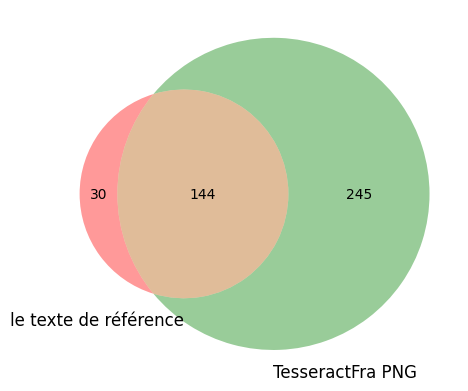

Valeur commune entre TesseractFra PNG et le texte de référence


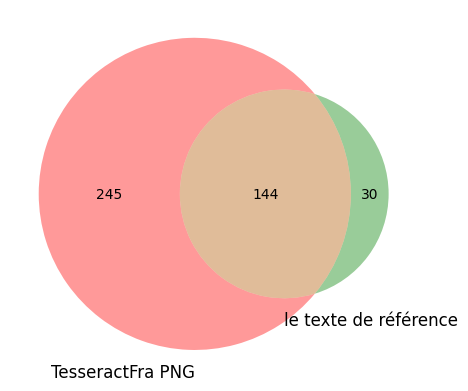

[['Kraken' '608' '174' '126' '482' '48']
 ['le texte de référence' '174' '496' '135' '39' '361']
 ['Tesseract binarisé' '496' '174' '135' '361' '39']
 ['le texte de référence' '174' '388' '146' '28' '242']
 ['Tesseract PNG' '388' '174' '146' '242' '28']
 ['le texte de référence' '174' '389' '144' '30' '245']
 ['TesseractFra PNG' '389' '174' '144' '245' '30']]
NOAILLES
Valeur commune entre Kraken et le texte de référence


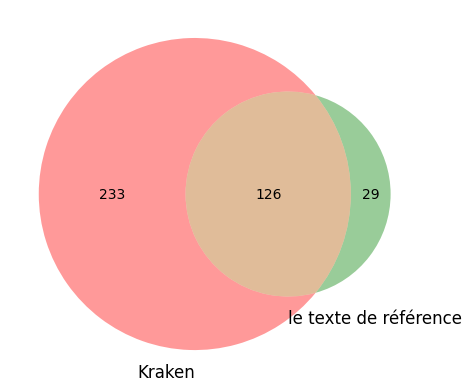

Valeur commune entre le texte de référence et Tesseract binarisé


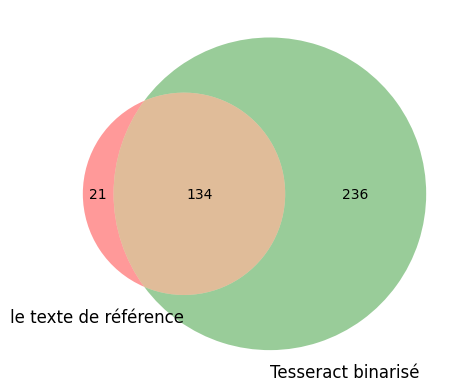

Valeur commune entre Tesseract binarisé et le texte de référence


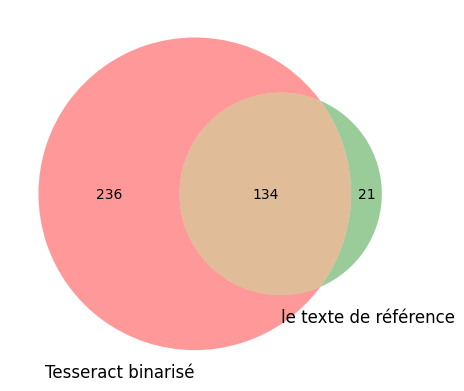

Valeur commune entre le texte de référence et Tesseract PNG


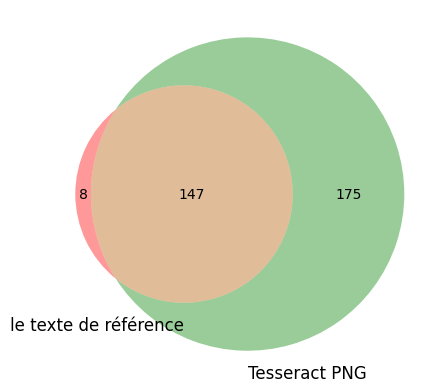

Valeur commune entre Tesseract PNG et le texte de référence


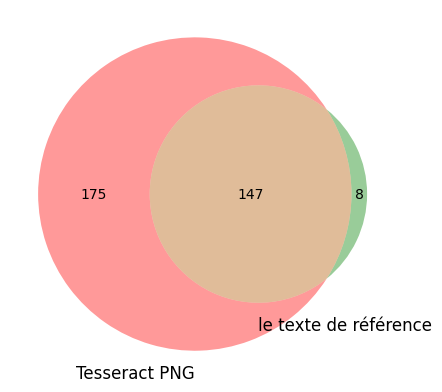

Valeur commune entre le texte de référence et TesseractFra PNG


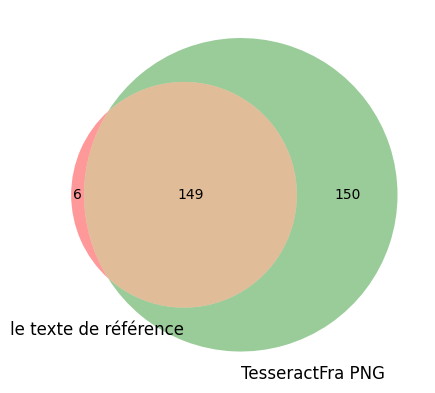

Valeur commune entre TesseractFra PNG et le texte de référence


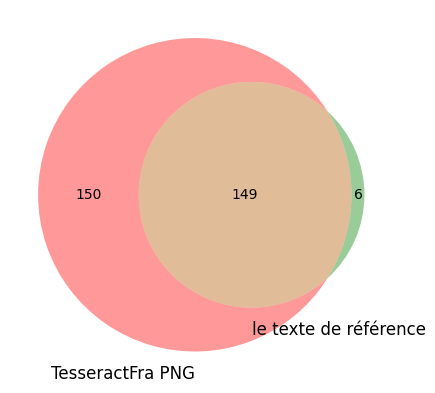

[['Kraken' '359' '155' '126' '233' '29']
 ['le texte de référence' '155' '370' '134' '21' '236']
 ['Tesseract binarisé' '370' '155' '134' '236' '21']
 ['le texte de référence' '155' '322' '147' '8' '175']
 ['Tesseract PNG' '322' '155' '147' '175' '8']
 ['le texte de référence' '155' '299' '149' '6' '150']
 ['TesseractFra PNG' '299' '155' '149' '150' '6']]


In [6]:
import os 

dliste = []
rootdir = "../DATA/DATA-Fra_spaCy3.3.1_CONCAT/"
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
        e = d+"/*/*/*.json" 
        print (file)
        Venn(e, "fr_core_news_lg")


#### Avec plusieurs modèles de langues

____ ____     ____ ____ ____ ____     _  _ ____ _ _ _ ____     ____ _  _ 
|___ |__/     |    |  | |__/ |___     |\ | |___ | | | [__      [__  |\/| 
|    |  \ ___ |___ |__| |  \ |___ ___ | \| |___ |_|_| ___] ___ ___] |  | 
                                                                         

ADAM


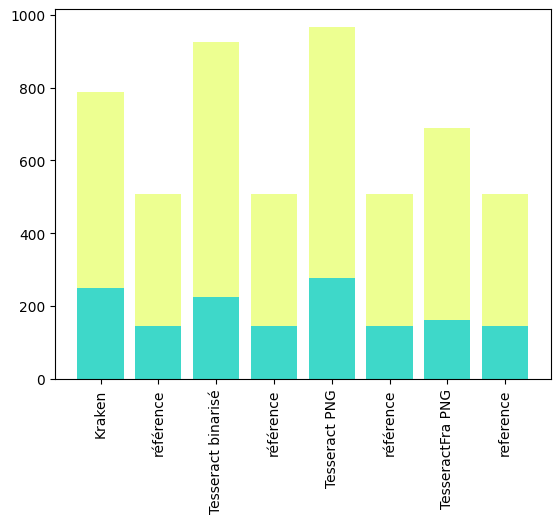

AIMARD_RIVIERE


KeyboardInterrupt: 

In [4]:
from art import *
import os
model_langue_fr = ["fr_core_news_sm","fr_core_news_lg", "en_core_web_trf","fr_dep_news_md"]
model_lang_en = ["en_core_web_sm", "en_core_web_lg", "en_core_web_trf", "en_core_web_md"]
models = ["fr_core_news_sm","fr_core_news_lg", "en_core_web_trf","en_core_web_sm", "en_core_web_lg", "en_core_web_trf", "en_core_web_md"]

rootdir = "../DATA/DATA-Fra_spaCy3.3.1_CONCAT/"
for model in models :
    tprint(model, font="cybermedum")
    for file in os.listdir(rootdir):
        d = os.path.join(rootdir, file)
        if os.path.isdir(d):
            e = d+"/*/*/*.txt" 
            print(file)
            batons(e, model)

